# Hazard assessment for HAZARD

- A workflow from the CLIMAAX [Handbook](https://handbook.climaax.eu/) and [HAZARD](https://github.com/CLIMAAX/HAZARD) GitHub repository.
- See our [how to use risk workflows](https://handbook.climaax.eu/notebooks/workflows_how_to.html) page for information on how to run this notebook.

## Hazard assessment methodology

Write here a description of how the hazard is calculated (max 500 words).  
The idea is that this script can be run by expert users to understand and potentially modify how the hazard map data is calculated for use in the risk toolbox CLIMAAX.  
Describe where the data can be found, is there an API to download it or the files can be downloaded from some data repository. Provide a link to the repository (as DOI if possible).

Explain the background of the hazard dataset and its limitations & applicability. e.g. resolution, physical processes taken into account, limitations on scale etc.

## Preparation work

### Select area of interest
Before downloading the data, we will define the coordinates of the area of interest. Based on these coordinates we will be able to clip the datasets for further processing, and eventually display hazard and damage maps for the selected area.

To easily define an area in terms of geographical coordinates, you can go to the [Bounding Box Tool](https://boundingbox.klokantech.com/) to select a region and get the coordinates. Make sure to select 'CSV' in the lower left corner and copy the values in the brackets below. Next to coordinates, please specify a name for the area which will be used in plots and saved results.

In [1]:
bbox = [-1.6, -1.05, 46, 46.4] # coordinates of the bounding box (x0, x1, y0, y1)
areaname = 'La_Rochelle' # name of the area for saving datasets and plots

### Load libraries

`````{admonition} Find more info about the libraries used in this workflow here 
:class: hint dropdown

In this notebook we will use the following Python libraries:
- [os](https://docs.python.org/3/library/os.html) - To create directories and work with files
- [pooch](https://www.fatiando.org/pooch/latest/index.html) - To download and unzip the data
- [xarray](https://docs.xarray.dev/en/stable/) - To process the data and prepare it for damage calculation
- [rioxarray](https://corteva.github.io/rioxarray/stable/) - Rasterio xarray extension - to make it easier to use GeoTIFF data with xarray
- [cartopy](https://scitools.org.uk/cartopy/docs/latest/) - To plot the maps
- [matplotlib](https://matplotlib.org/) - For plotting as well
`````

In [2]:
import os

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
#import numpy as np
#import pooch
import xarray as xr

### Create the directory structure
In order for this workflow to work even if you download and use just this notebook, we need to set up the directory structure.  
Next cell will create the directory called 'my_workflow' in the same directory where this notebook is saved.


:::{tip} Don't forget!
Replace **my_workflow** with the workflow name and delete this note
:::


In [ ]:
workflow_folder = 'my_workflow'
os.makedirs(workflow_folder, exist_ok=True)

# Define directories for data and plots within the previously defined workflow folder
data_dir = os.path.join(workflow_folder, f'data_{areaname}')
plot_dir = os.path.join(workflow_folder, f'plots_{areaname}')

os.makedirs(data_dir, exist_ok=True)
os.makedirs(plot_dir, exist_ok=True)

### Access and view dataset

**You can keep the text below if you want to use pooch for downloading. Otherwise add a text about the API and delete the pooch bit.**

The data we are using is available as compressed ZIP files in the JRC data portal. 
Since there is no API to download this data, we can use **[pooch](https://www.fatiando.org/pooch/latest/index.html)** library to donwload and unzip the data.  

Pooch will check if the zip file already exists by comparing the hash of the file with what is stored in the default and only download it if it is not already there.

#### First type of data
First we need the information on land use. We will download it from the JRC data portal.

:::{tip} Here's an example of the text and code
Once the data is downloaded and unzipped, Pooch will list the content of the directory with the data.

```python
url = 'https://cidportal.jrc.ec.europa.eu/ftp/jrc-opendata/LUISA/PrimaryOutput/Europe/REF-2014/JRC_LUISA_Output_land_use_ref_2014.zip'
pooch.retrieve(
    url=url,
    known_hash=None,
    path=data_dir,
    processor=pooch.Unzip(extract_dir='')
)
```

:::

## Explore the data
Now that we have downloaded and unpacked the needed data, we can have a look what is inside.  

### Some data I
Add text about your data here.

Explain the folder structure and file names.

All the downloaded files are stored in our **data_dir** folder, with filenames starting with: ...  
First we can explore one of them.

:::{tip} Explore the file content
Fell free to explore the content and structure of the datasets.  
Note the coordinates, dimensions and attributes!
:::

:::{hint} Find the information about spatial references, statistics👆 (click)
:class: dropdown
👋 Click on **spatial_ref** 📄 _show/hide attributes_ to see the spatial information  
👋 Look at _STATISTICS_ attributes to find minimum, maximum and other statistics

:::

In [ ]:
# code here to open and show the data

### Some data II
Add text about other dataset you are using here.  

If there are more files in the directory, you can list the directory and explain what is what.

In [ ]:
#with os.scandir(f'{data_dir}/other_data') as entries:
#    for entry in entries:
#        print(entry.name)

Let's explore one of the dataset files, for example this one...  
Write which library is used, especially if it is different from other datasets.

In [ ]:
# code here to open and show the data
data = xr.open_dataset("...")

## Process the data

Explain why the processing is needed. For example:
- if the data is global, we might need to crop all the datasets to the area of interest, set the coordinates of the bounding box in a separate cell
- if datasets have different resolution and projection we need to reproject one of them and interpolate to the same resolution in order to be able to do computations.
- try to use areas of one of the pilots in the examples

Explain which libraries are used in this step and why.

:::{tip} Here's an example text:

If we have a closer look at the x and y dimensions of the datasets, we can see that the data has different resolutions. Flood extent maps are at 100 m resolution, while land use data is at 1km. We can use xarray to get them to the same resolution.  

But first we need to clip them to the same area, so we don't interpolate the whole global field.   

For this we use the rioxarray library again.  
**minx** and **maxx** are longitudes, and **miny** and **maxy** are latitudes of the bounding box.  

In this example we are clipping the bounding box around city of Zilina in Slovakia.
:::

In [ ]:
# code cell with processing

#### Explanation of the processing step I

Explain the processing step, what library is used and why.  
Try to include links to the documentation about the functions you are using.

In [ ]:
# code cell with processing, for example:
#flood_200_small_area_1km  = flood_200_small_area.interp_like(land_use_small_area, method='nearest')
#flood_200_small_area_1km

You may include a simple plot to quickly visualise the result. But make sure to explain what is plotted

In [ ]:
#flood_200_small_area_1km.plot()

## Visualize the hazard data

Text(0.5, 1.0, 'Hazard map for La_Rochelle')

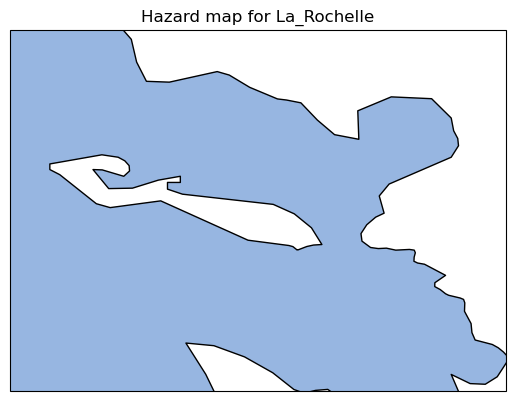

In [3]:
PLATE = ccrs.PlateCarree()

fig, ax = plt.subplots(1, 1, subplot_kw={ "projection": PLATE })

ax.set_extent(bbox, crs=PLATE)
ax.coastlines()
ax.add_feature(cfeature.OCEAN)

ax.set_title(f"Hazard map for {areaname}")

## Save dataset to a local directory for future access
Now that we have loaded the full dataset, we will save it to a local folder to be able to easily access it later. There are two options for saving the dataset: as a single netCDF file containing all scenarios, and as separate raster files (**.tif** format).

{Save to data_dir}

## Conclusions

Some text about conclusions and lessons learned

## Contributors
authors, links to libraries documentation, references etc